In [1]:
#!/usr/bin/env python3
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np, pandas as pd, tensorflow as tf, math
from model import *
from utils import *
from sweep_configs import *
from train import *
%matplotlib inline

Welcome to JupyROOT 6.26/04


/home/robin/.local/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


## Comparison of Model and Hough Transform Method
### Integration/training of model currently not possible (ROOT related)
### -> make comparison in python:
### -> create reference set with ideal HTM
### -> calculate accuracy/loss with model
### -> calcucate accuracy/loss with standard HTM

load data from  ../data/features.csv  -> 1000  events loaded


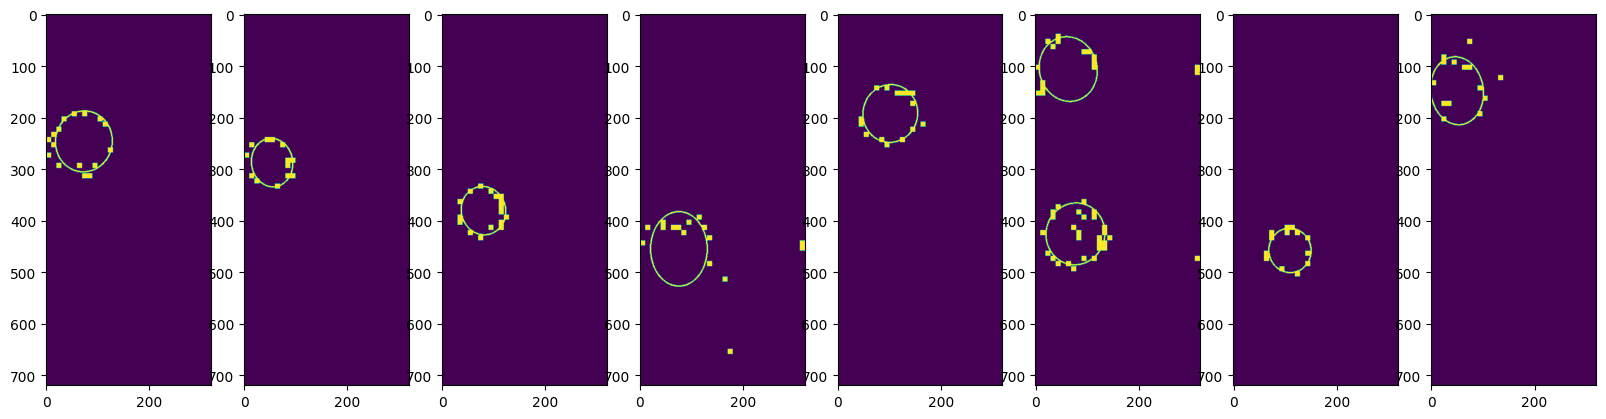

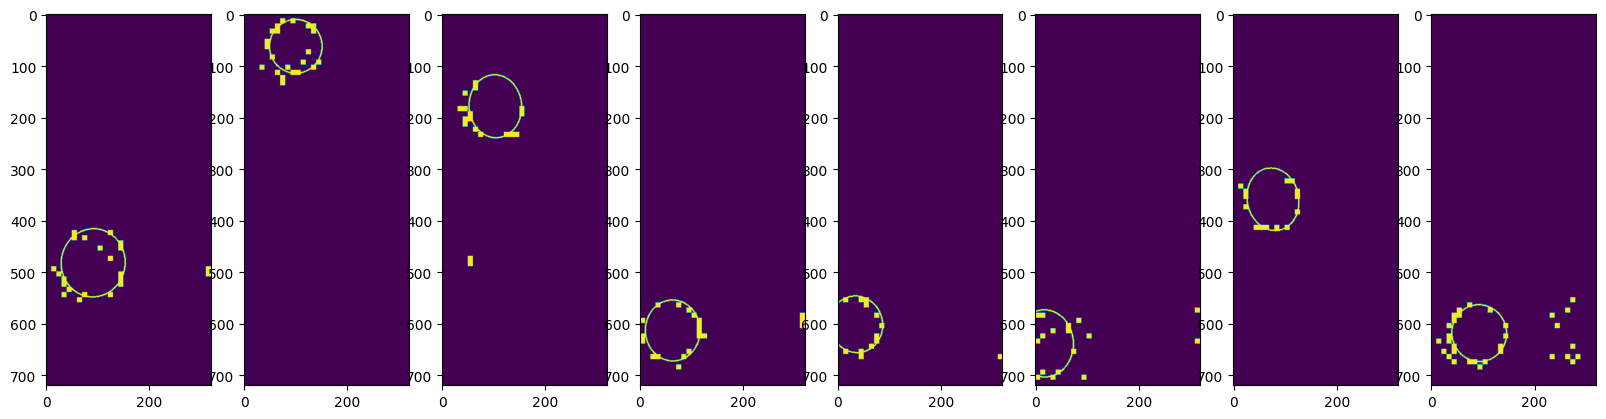

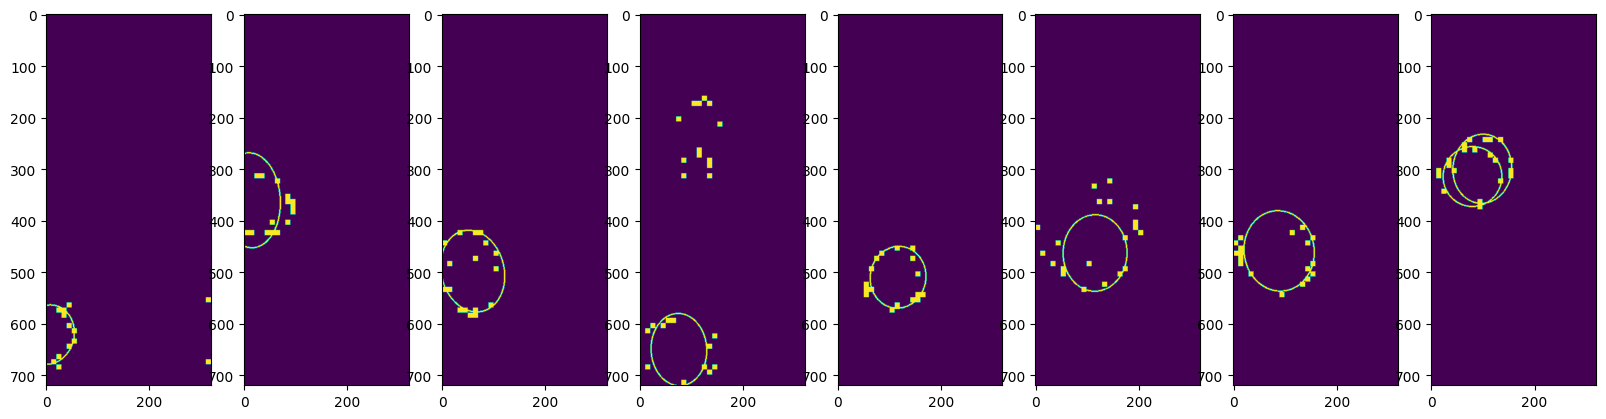

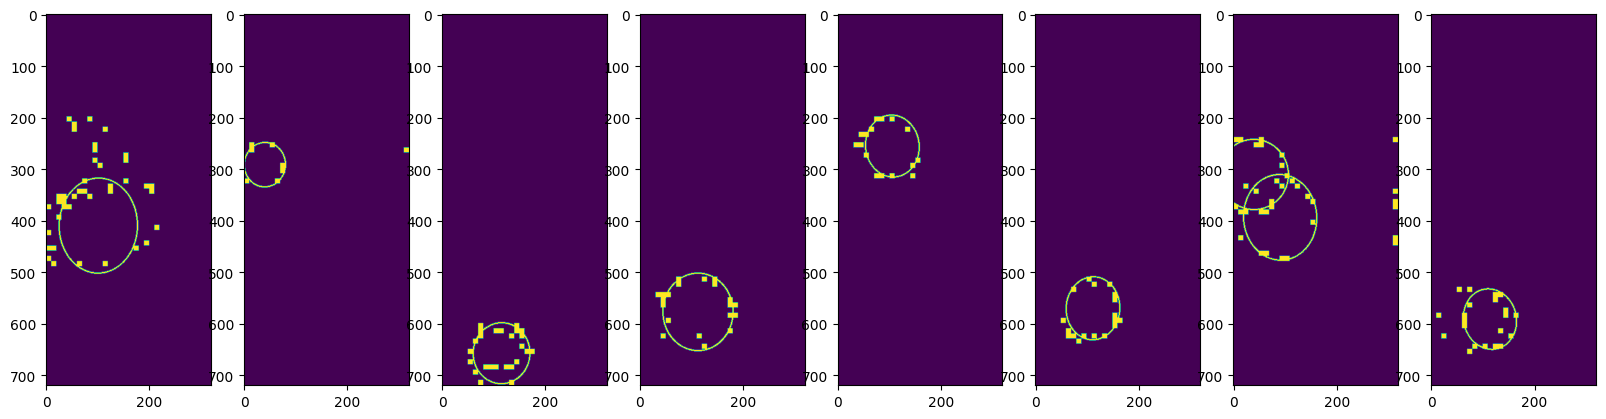

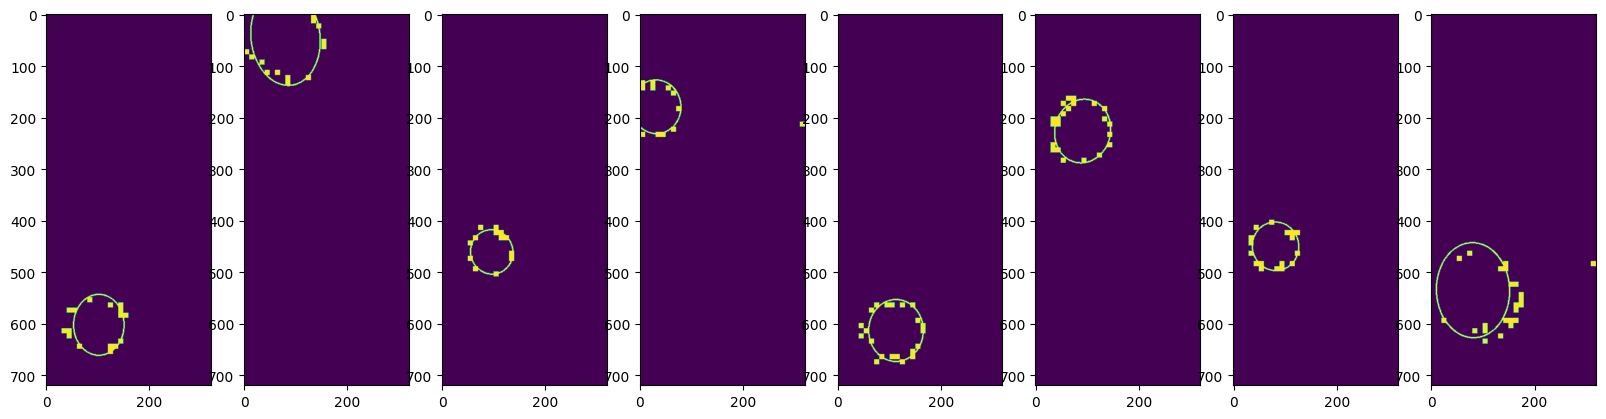

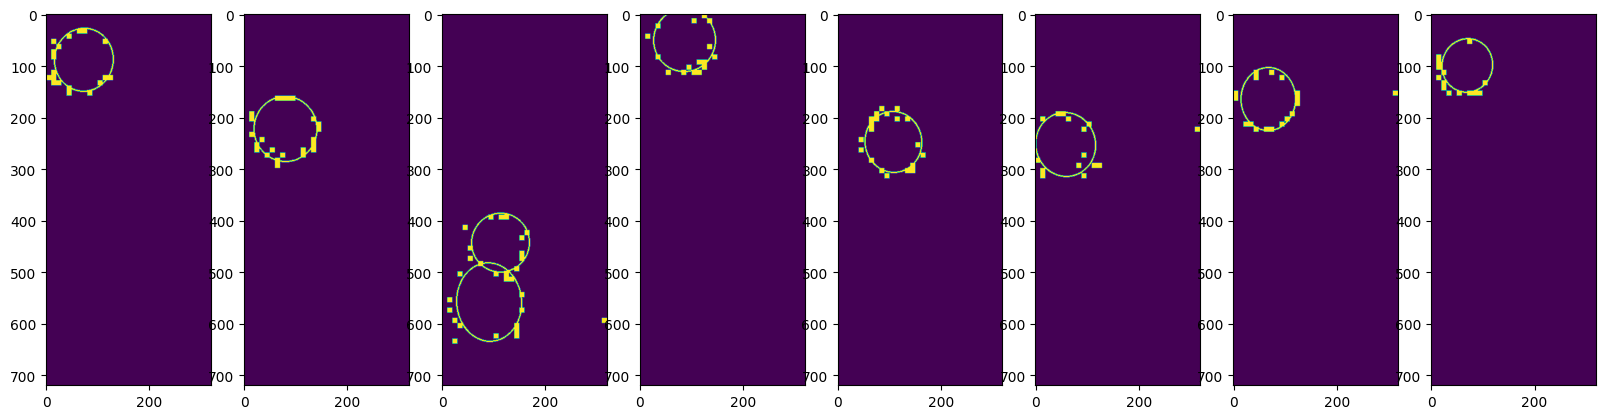

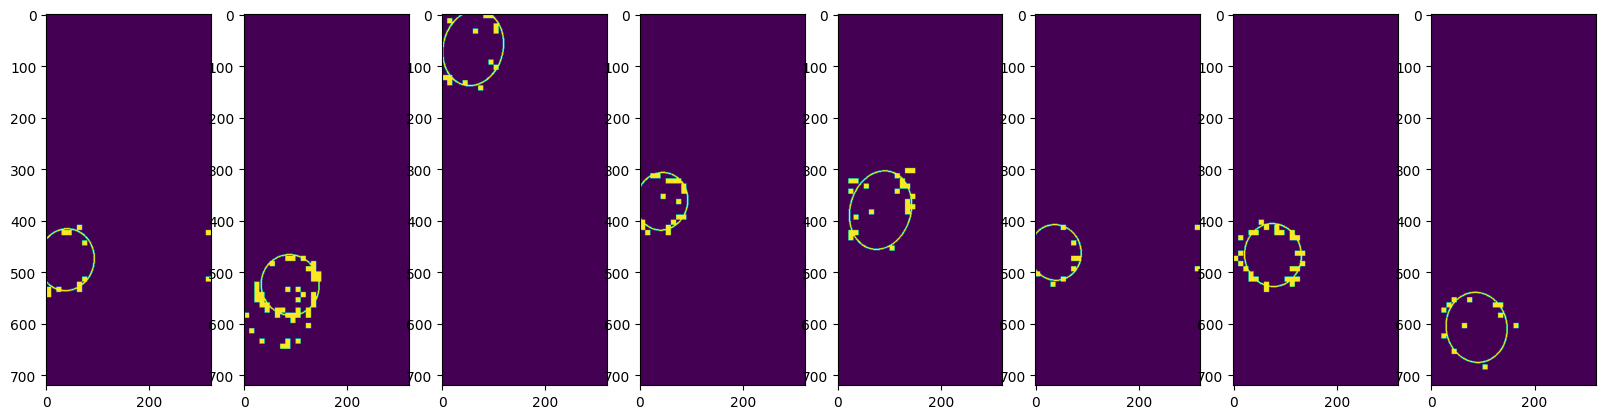

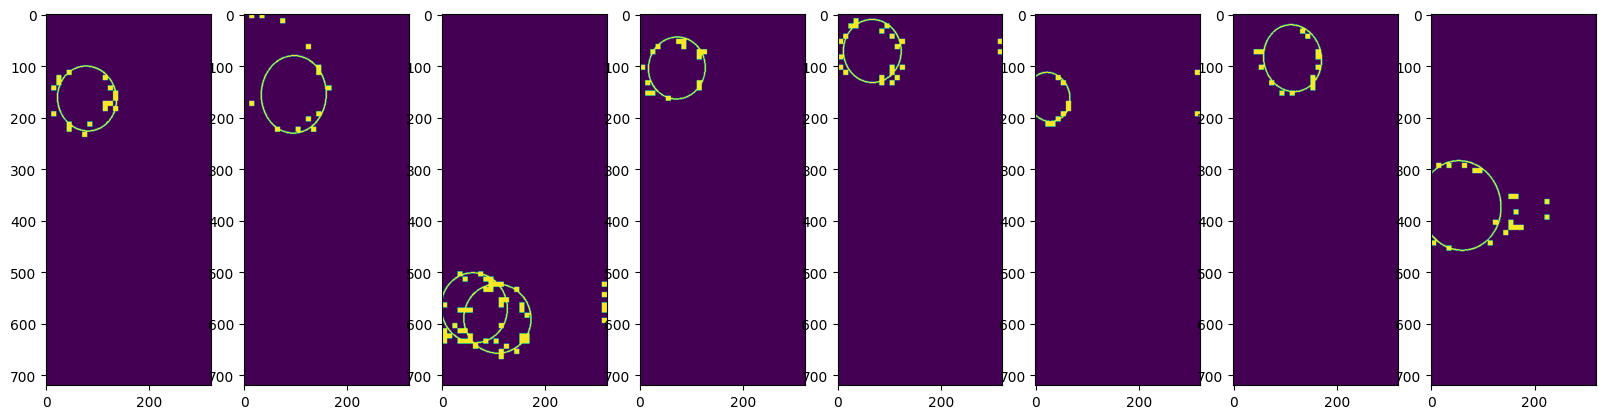

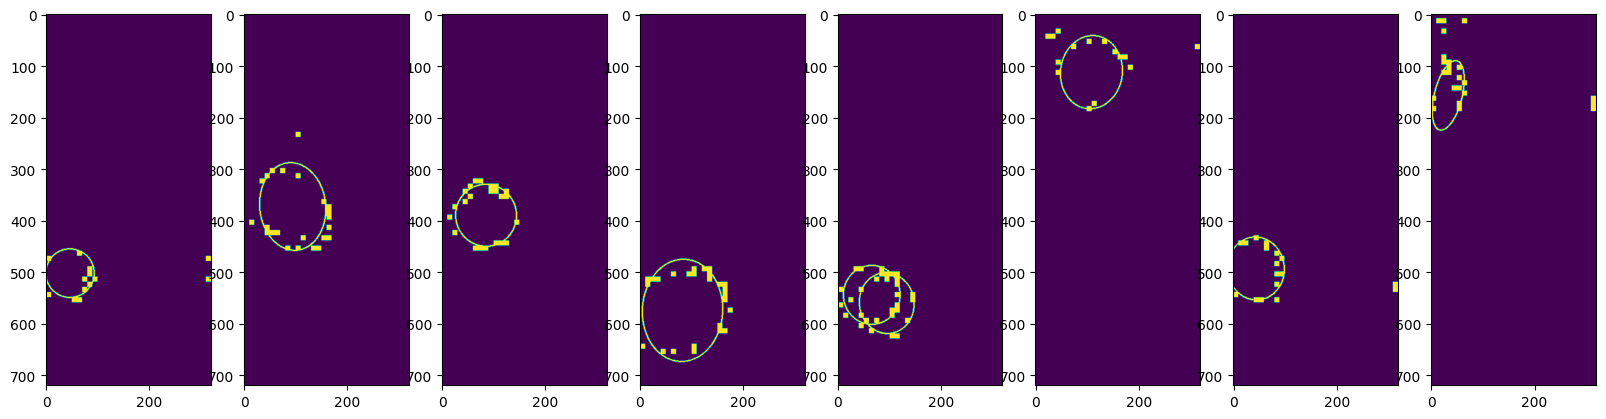

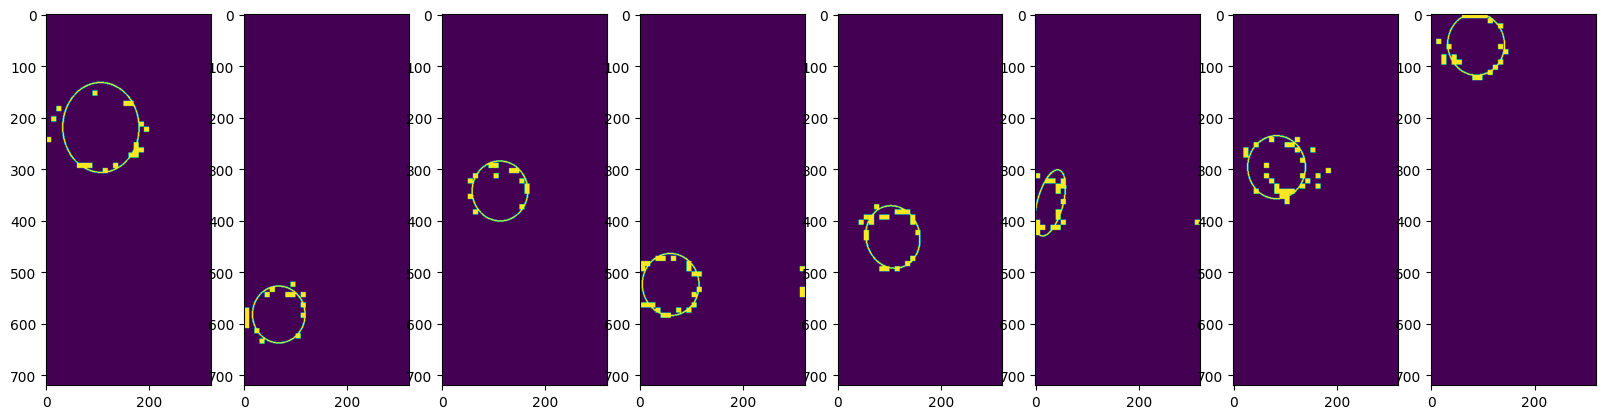

In [2]:
sim_x = np.array(loadFeatures("../data/features.csv"))
#sim_x = np.array([cv2.merge((a,a,a)) for a in sim_x])
ideal_hough_y = loadParameters("../data/targets.csv")

sim_x, ideal_hough_y = filter_events(sim_x, ideal_hough_y) # filter events with incorrectly fitted rings

ideal_hough_y = ideal_hough_y.reshape(ideal_hough_y.shape[0], 5, 5)

hough = np.array([plot_single_event(sim_x[i], ideal_hough_y[i]) for  i in range(sim_x.shape[0])])
display_images(1,8, hough, 10)

7/7 [==============================] - 2s 46ms/step


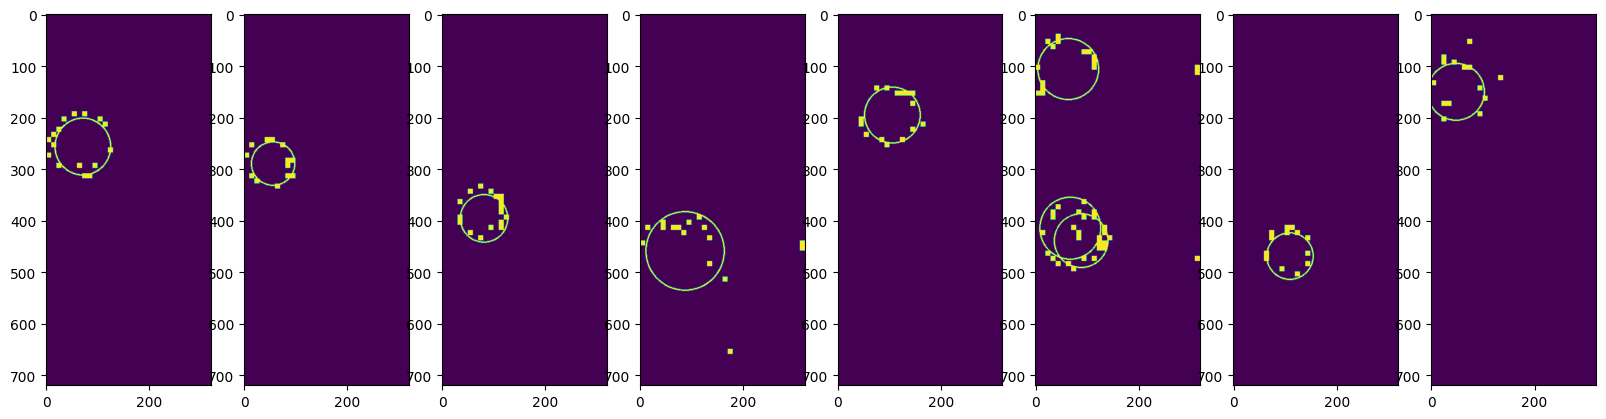

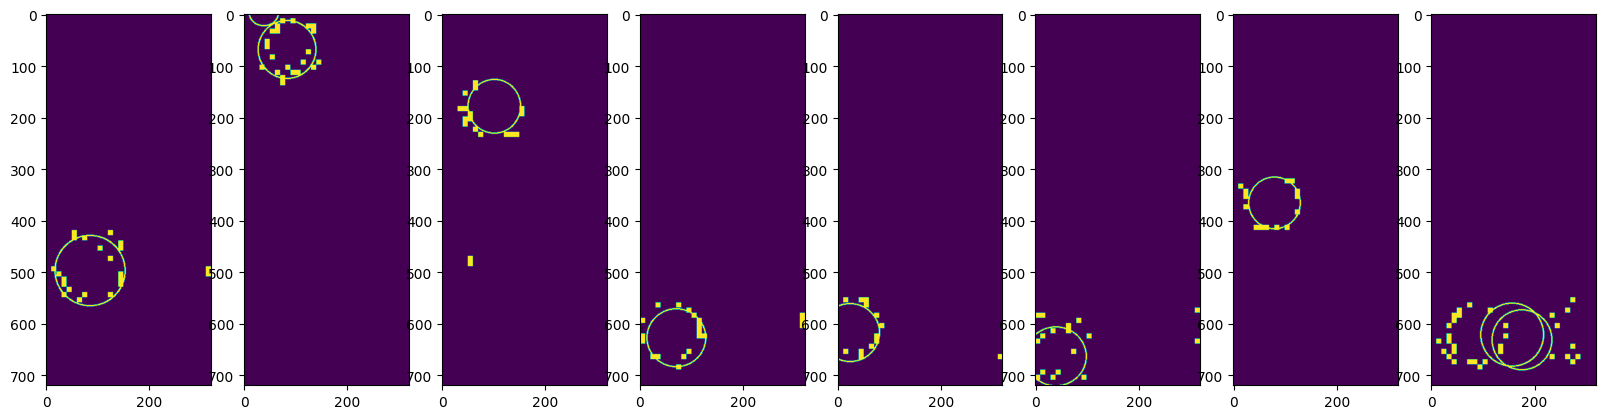

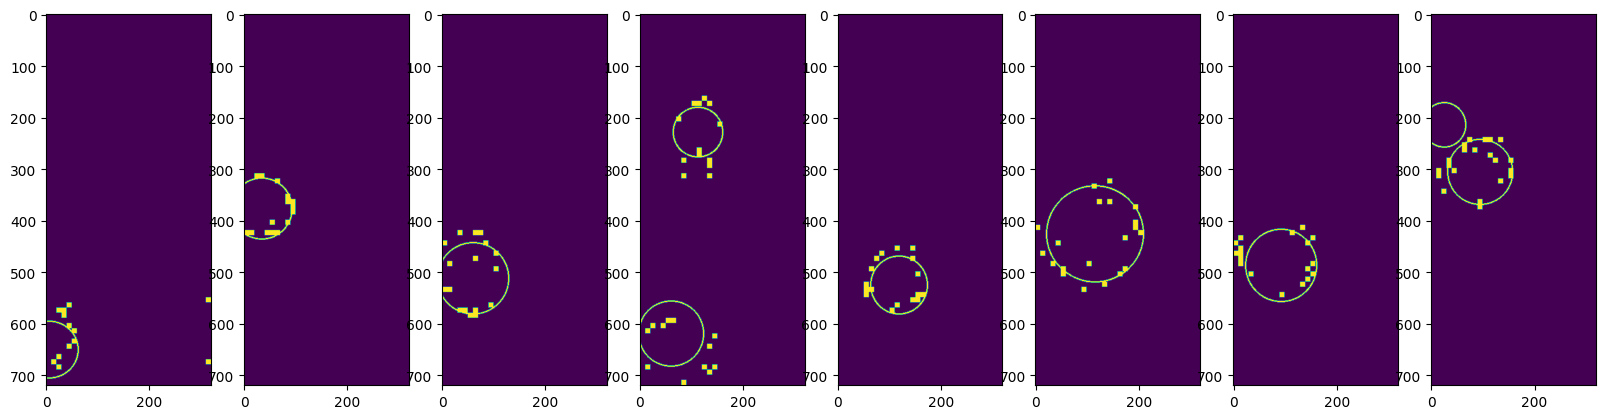

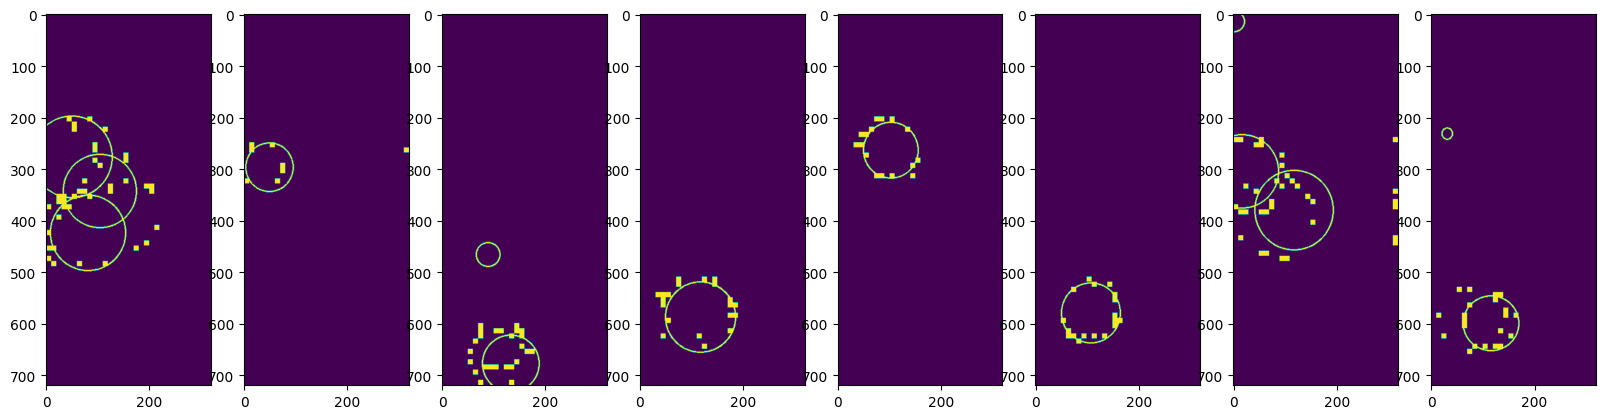

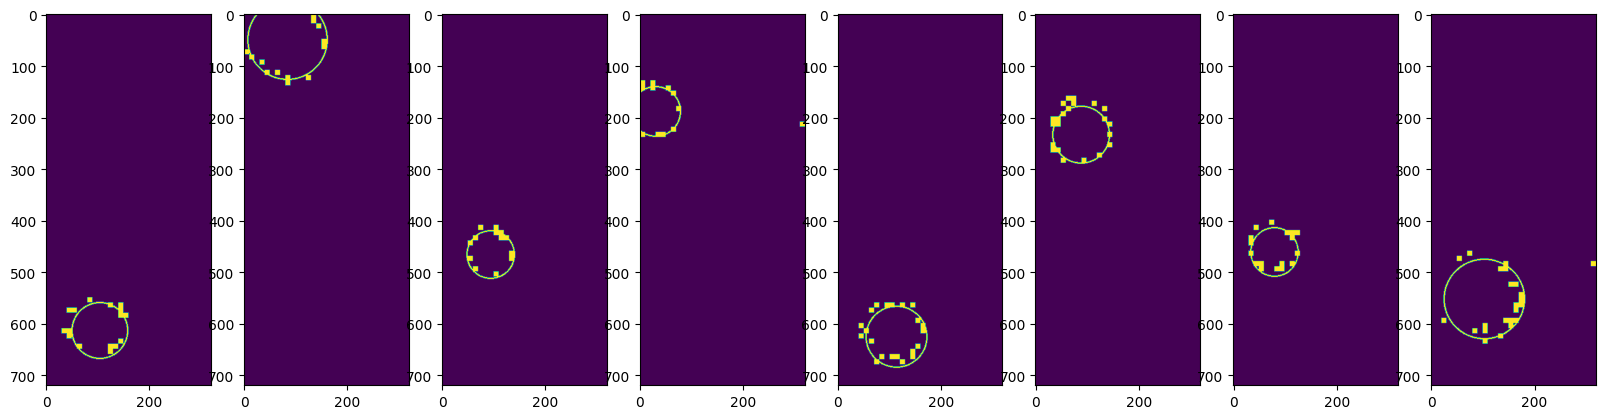

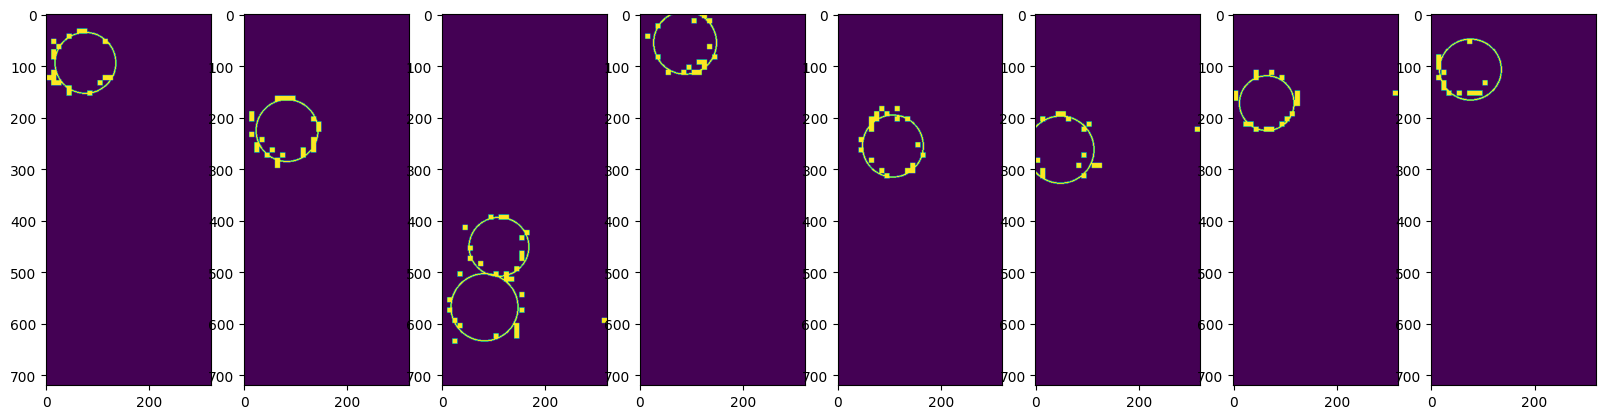

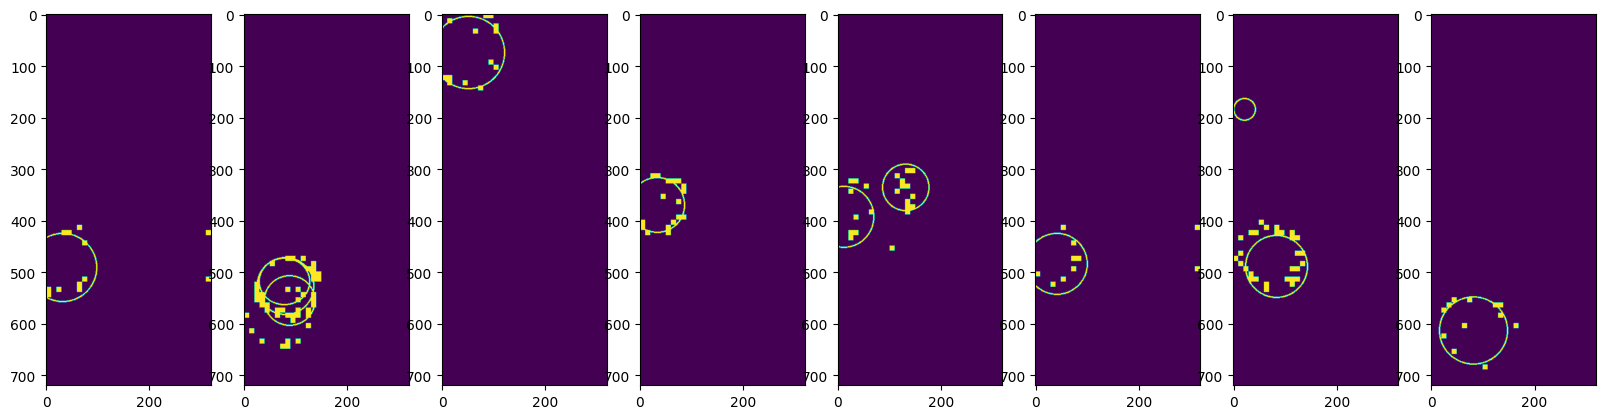

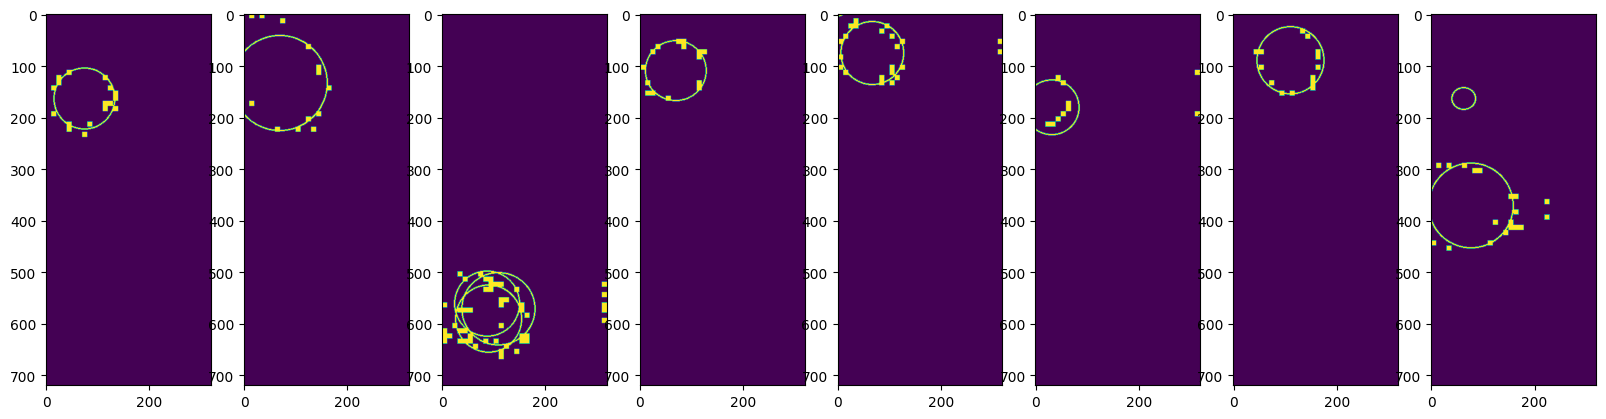

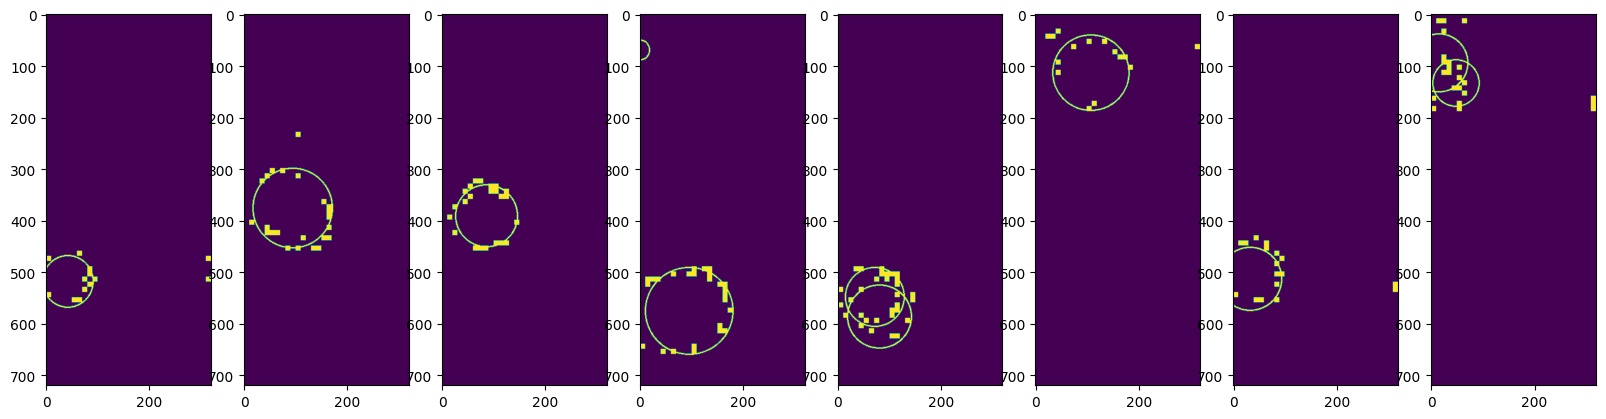

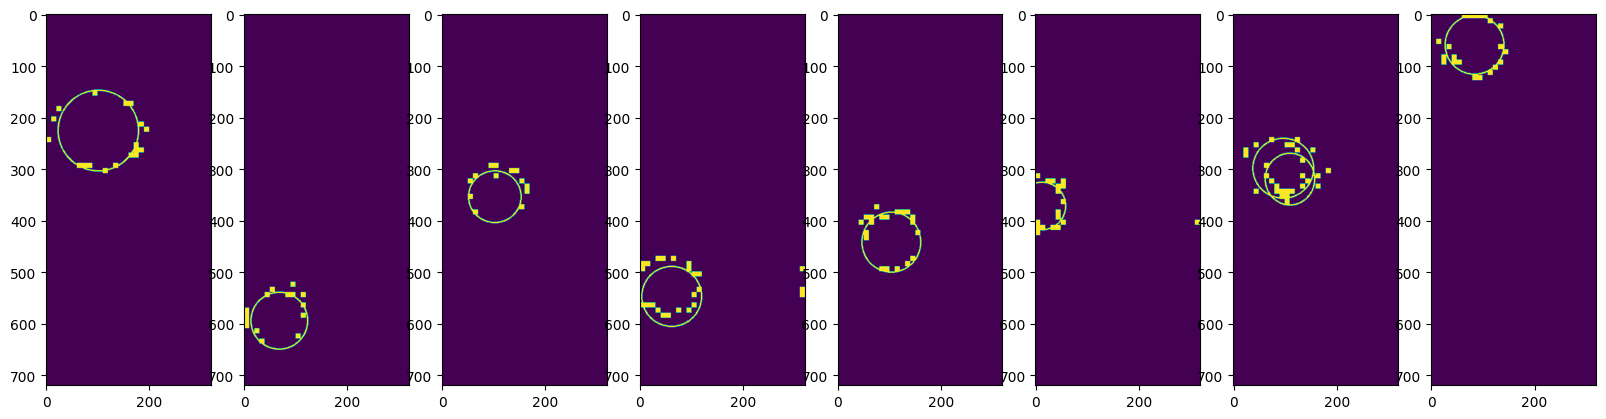

In [3]:
#model = tf.keras.models.load_model("../models/checkpoints/200k-202206201307.model")
model = tf.keras.models.load_model("../models/checkpoints/generator-202206211041.model/")
#model = tf.keras.models.load_model("../models/bmsf2.model") # x and y swapped in this model
pred = model.predict(sim_x)
#pred = np.pad(pred, ((0,0),(0,10))).reshape(pred.shape[0], 5, 5)

#for event in pred:
#    for ring in event:
#        crop = ring[] # check if all rings have at least # of hits inside bbox around ring center

predictions = [plot_single_event(x, y) for x, y in zip(sim_x,pred)]
display_images(1, 8, predictions, 10)